In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
train_images = tf.keras.preprocessing.image_dataset_from_directory(
    "E:/Python/ML/Pneumonia Recognition/chest_xray/train",
    image_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

test_images = tf.keras.preprocessing.image_dataset_from_directory(
    "E:/Python/ML/Pneumonia Recognition/chest_xray/test",
    image_size = (224, 224),
    batch_size = 32
)

val_images = tf.keras.preprocessing.image_dataset_from_directory(
    "E:/Python/ML/Pneumonia Recognition/chest_xray/val",
    image_size = (224, 224),
    batch_size = 32
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [ ]:
for image, label in train_images.take(2):
    for i in range(image.shape[0]):
        plt.figure(figsize=(50, 50))
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.show

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,631,169 (21.48 MB)

 Trainable params: 5,631,169 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_images = train_images.shuffle(buffer_size=1000)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs = 6
)

Epoch 1/6


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

NameError: name 'model' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


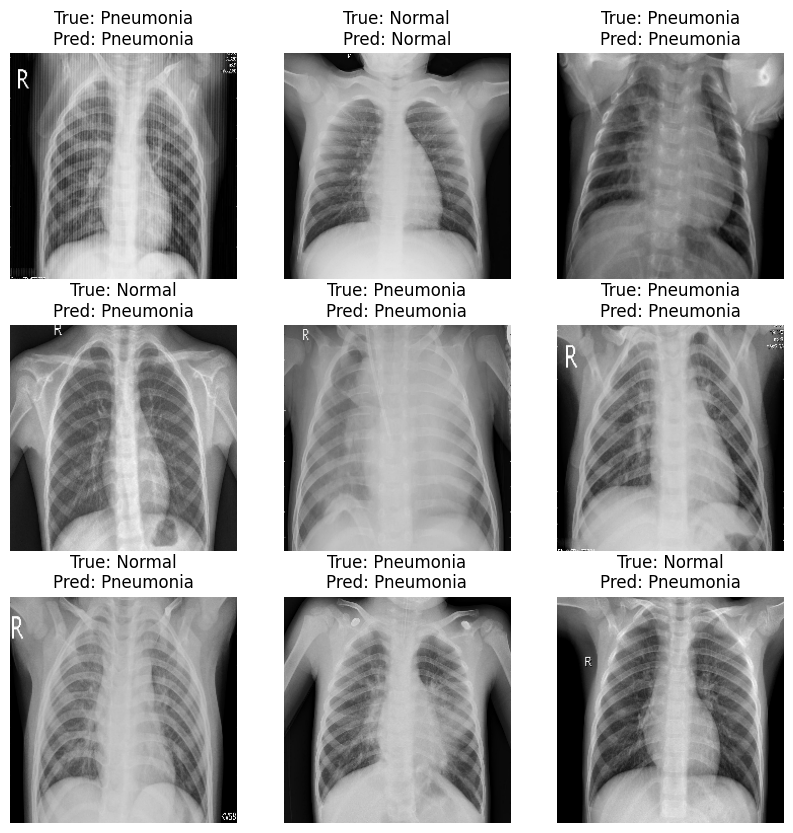

In [ ]:
for images, labels in test_images.take(1):
    predictions = model.predict(images)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predict_label = 'Pneumonia' if predictions[i] > 0.5 else 'Normal'
        true_label = 'Pneumonia' if labels[i] == 1 else 'Normal'

        plt.title(f"True: {true_label}\nPred: {predict_label}")
        plt.axis('off')
    plt.show()